In [1]:
import pandas as pd    
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns 
        

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
internet_use = pd.read_csv('../data/internet_use.csv', nrows=4497)

In [3]:
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


QUESTION 5. PART A -  How many rows and columns are in gdp_df?

In [5]:
gdp_df.shape

(7176, 4)

QUESTION 5. PART B -What are the data types of each column? 

In [6]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


In [7]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


In [8]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [9]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value' : 'GDP_Per_Capita'})

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [11]:
country_count = gdp_df.groupby('Country').count()


In [12]:
country_count.max()


Year              31
GDP_Per_Capita    31
dtype: int64

In [13]:
country_count == country_count.max()

,Year,GDP_Per_Capita
Country,,
Afghanistan,False,False
Africa Eastern and Southern,True,True
Africa Western and Central,True,True
Albania,True,True
Algeria,True,True
...,...,...
Vietnam,True,True
West Bank and Gaza,False,False
World,True,True


QUESTION 7. PART A -  How many countries have data for all years?

In [14]:
countries_with_data = (country_count == country_count.max()).sum()
countries_with_data

Year              205
GDP_Per_Capita    205
dtype: int64

In [15]:
countries_missing_data = country_count.query ('Year < 31' )



In [16]:
countries_missing_data = countries_missing_data.reset_index()


QUESTION 7. PART B -Which countries are missing many years of data?

In [18]:
countries_missing_data['Country']

0                   Afghanistan
1        Bosnia and Herzegovina
2                      Cambodia
3                        Canada
4                Cayman Islands
5                       Croatia
6                      CuraÃ§ao
7                      Djibouti
8                       Estonia
9                       Hungary
10                      Iceland
11                       Israel
12                       Kosovo
13                       Kuwait
14                       Latvia
15                      Liberia
16                        Libya
17                    Lithuania
18                     Maldives
19                      Moldova
20                   Montenegro
21                        Nauru
22           Other small states
23                        Palau
24                        Qatar
25                   San Marino
26                       Serbia
27    Sint Maarten (Dutch part)
28              Slovak Republic
29                     Slovenia
30                 Small states
31      

QUESTION 7. PART C - Look at the number of observations per year. What do you notice? There was an increase in th number of observations per year each passing year. Many of the countries that are missing data are msall countries where it might be hard to collect data for various reasons

In [19]:
year_count = gdp_df.groupby('Year').count()
year_count

,Country,GDP_Per_Capita
Year,,
1990,206,206
1991,207,207
1992,208,208
1993,209,209
1994,211,211
1995,222,222
1996,222,222
1997,226,226
1998,226,226


In [27]:
gdp2020 = gdp_df.query('Year == 2020')
gdp2020.reset_index(drop=True)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Africa Eastern and Southern,2020,3491.978104
2,Africa Western and Central,2020,4021.293919
3,Albania,2020,13253.733337
4,Algeria,2020,10735.382539
...,...,...,...
235,Vietnam,2020,10338.270543
236,West Bank and Gaza,2020,5402.538773
237,World,2020,16269.969854
238,Zambia,2020,3277.816510


Text(0.5, 0, 'GDP Per Capita')

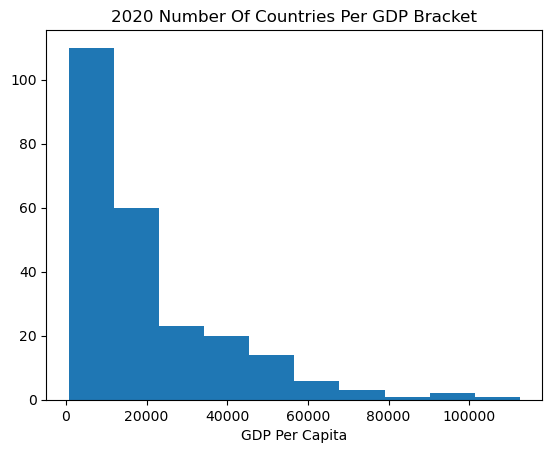

In [38]:
plt.hist(gdp2020.GDP_Per_Capita)
plt.title('2020 Number Of Countries Per GDP Bracket')
plt.xlabel('GDP Per Capita')

Text(0.5, 0, 'GDP Per Capita')

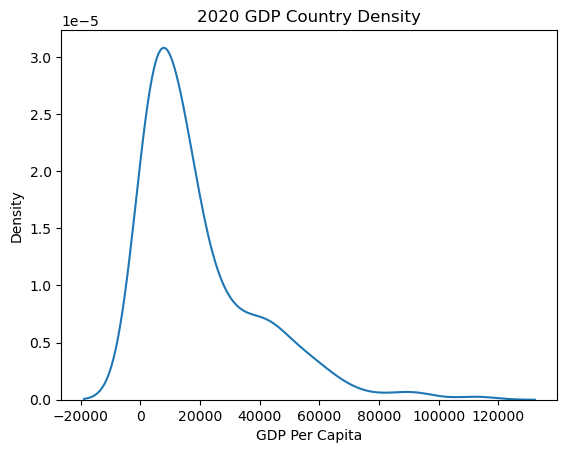

In [41]:
sns.kdeplot(gdp2020.GDP_Per_Capita)
plt.title('2020 GDP Country Density Chart')
plt.xlabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

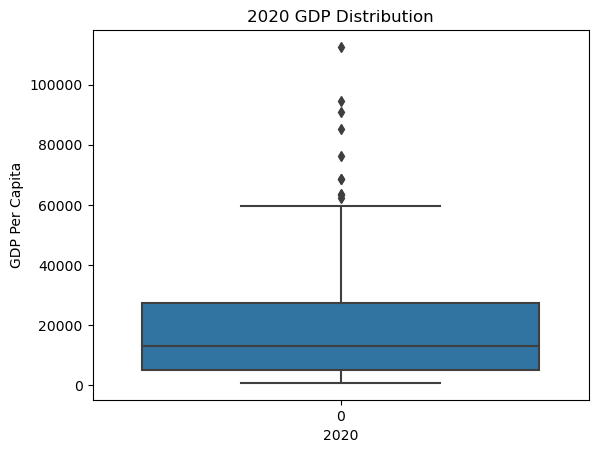

In [45]:
sns.boxplot(gdp2020.GDP_Per_Capita)
plt.title('2020 GDP Distribution')
plt.xlabel('2020')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

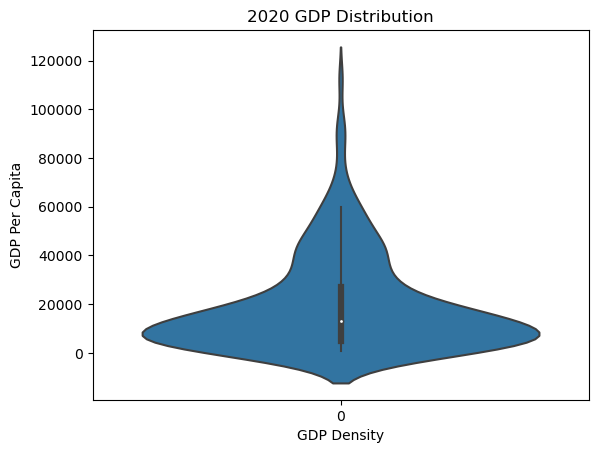

In [47]:
sns.violinplot(gdp2020.GDP_Per_Capita)
plt.title('2020 GDP Distribution')
plt.xlabel('GDP Density')
plt.ylabel('GDP Per Capita')

Question 8 - What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
The main thing I notice when looking at these charts it that there are signficantly more countries reporting low GDP. The higher the GDP amoutn is, the fewer countries report that amont in a year, this would indicate there is not an equall distrubtion of wealth amond coutnries in the world. The charts are all effective at communicating that disparty in GDP between countries. Some of the charts, such as the density chart, shows what the desnity is for each gdp point. other charts like the box and violin chart are effective at showing what the average is as well is how each country compares to the average. 